### ***Perceptron***

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
excel = "Dataset.xlsx"

# *Test Perceptron model here!!*

In [2]:
def importtrain(excel):
    x = pd.read_excel(excel, index_col=None, header=1)
    x['init'] = 1
    cols = ['init', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','Class']
    whole = x.reindex(columns = cols)
    
    x_val = whole.iloc[:, 0:10]
    y_val = whole.iloc[:, 10]
    return x_val, y_val, whole

def importtest(excel):
    testset = pd.read_excel(excel, sheet_name=1, header=1, index_col=None)
    testset['init'] = 1
    cols = ['init', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','Class']
    testset = testset.reindex(columns = cols)
    testset = testset.iloc[:,0:10]
    return testset

def dividebaseclass(data):
    C1 = [] #store the tuples whose class is 0
    C2 = [] #store the tuples whose class is 1
    C3 = [] #store the tuples whose class is -1
    for i in range(0,len(data)):
        if data.iloc[i][10] == 0:
            C1.append(data.iloc[i].tolist())
        elif data.iloc[i][10] == 1:
            C2.append(data.iloc[i].tolist())
        elif data.iloc[i][10] == -1:
            C3.append(data.iloc[i].tolist())
    return C1, C2, C3

def combined_split(A,B,C,train_data):
    a = A[0][10] #the class value in A
    b = B[0][10] #the class value in B
    c = C[0][10] #the class value in C
    d = [a, b, c]
    x = []
    y = []
    for i in range(0,len(train_data)):
        if train_data.iloc[i][10] == a: #let one class be 0
            x.append(train_data.iloc[i][0:10].tolist())
            y.append(0)
        else: #another class be 1
            x.append(train_data.iloc[i][0:10].tolist())
            y.append(1) 
    return x, y, d

def predict_output(w, tup):
    sumval = w.dot(tup)
    #using step function
    if sumval >= 0:
        predO = 1
    else:
        predO = 0
    return predO

def adjustment(w, predO, obserT, record, alpha, num, x):
    if obserT == predO:
        w = w
    else:
        record = record + 1
        for k in range(0, len(x[num])):
            w[k] = w[k] + alpha*(obserT-predO)*x[num][k]
    w_new = w
    return w_new, record

def each_iter(w, alpha, x, y):
    record = 0 #if T is different from O, then add 1
    for i in range(0,len(x)):
        predO = predict_output(w, x[i])
        obserT = y[i]
        w, record = adjustment(w, predO, obserT, record, alpha, i, x)
    return w, record

def hyperplane(alpha, x, y, tol):
    x = np.array(x)
    y = np.array(y)
    m, n = x.shape #n=10
    w = np.zeros(n) #initial value be 0
    itera = 1
    w_update, record = each_iter(w, alpha, x, y)
    while record > len(x)*tol: #lower the possibilitiies/tolerance
        itera = itera + 1
        w_update, record = each_iter(w_update, alpha, x, y) 
        if itera >= 10: 
            tol = tol + 0.0005
            w_update, itera, tol = hyperplane(alpha, x, y, tol) #find the fitted tolerance 
            break
    return w_update, itera, tol

#make three hyperplane by splitting into 1:2
def threehyper(excel, sp, alpha):
    x, y, dataset = importtrain(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=sp, random_state=2)
    train_data = dataset.iloc[x_train.index, :]
    C1, C2, C3 = dividebaseclass(train_data)
    w = []
    c = []
    x1, y1, c1 = combined_split(C1,C2,C3,train_data)
    c.append(c1)
    x2, y2, c2 = combined_split(C2,C1,C3,train_data)
    c.append(c2)
    x3, y3, c3 = combined_split(C3,C1,C2,train_data)
    c.append(c3)
    
    w1, itera1, tol1 = hyperplane(alpha, x1, y1, 0)
    w.append(w1)
    w2, itera2, tol2 = hyperplane(alpha, x2, y2, 0)
    w.append(w2)
    w3, itera3, tol3 = hyperplane(alpha, x3, y3, 0)
    w.append(w3)
    return c, w, y_test, x_test

#do voting among three hyperplane
def voting(w, c, tup):
    voting = []
    for i in range(0,len(w)):
        product = w[i].dot(tup)
        if product < 0:
            voting.append(c[i][0])
        else:
            voting.append(c[i][1])
            voting.append(c[i][2])
    result = max(set(voting), key=voting.count)
    return result

def PerceptronModel(excel, sp, alpha):
    c, w, y_test, x_test = threehyper(excel, sp, alpha)
    y_pred = []
    for i in range(0, len(x_test)):
        tup = x_test.iloc[i].tolist()
        tup = np.array(tup)
        result = voting(w, c, tup)
        y_pred.append(result)
    return y_pred, y_test

def PerceptronModel_test(excel, sp, alpha):
    c, w, y_test, x_test = threehyper(excel, sp, alpha)
    test = importtest(excel)
    y_pred = []
    for i in range(0, len(test)):
        tup = test.iloc[i].tolist()
        tup = np.array(tup)
        result = voting(w, c, tup)
        y_pred.append(result)
    return y_pred

#### Train model here!

In [3]:
y_pred, y_test = PerceptronModel(excel, 0.3, 1)
metrics.accuracy_score(y_test, y_pred)

0.7287234042553191

#### Use model here!

In [5]:
final = PerceptronModel_test(excel, 0.3, 1)
len(final)

100

# *Interpretation (Do NOT RUN) !!*

### Import training data based on classes

In [6]:
def importtrain(excel):
    x = pd.read_excel(excel, index_col=None, header=1)
    x['init'] = 1
    cols = ['init', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','Class']
    whole = x.reindex(columns = cols)
    
    x_val = whole.iloc[:, 0:10]
    y_val = whole.iloc[:, 10]
    return x_val, y_val, whole

### Dividing dataset based on classes

In [7]:
def dividebaseclass(data):
    C1 = [] #store the tuples whose class is 0
    C2 = [] #store the tuples whose class is 1
    C3 = [] #store the tuples whose class is -1
    for i in range(0,len(data)):
        if data.iloc[i][10] == 0:
            C1.append(data.iloc[i].tolist())
        elif data.iloc[i][10] == 1:
            C2.append(data.iloc[i].tolist())
        elif data.iloc[i][10] == -1:
            C3.append(data.iloc[i].tolist())
    return C1, C2, C3

### Combining two different classes

In [8]:
def combined_split(A,B,C,train_data):
    a = A[0][10] #the class value in A
    b = B[0][10] #the class value in B
    c = C[0][10] #the class value in C
    d = [a, b, c]
    x = []
    y = []
    for i in range(0,len(train_data)):
        if train_data.iloc[i][10] == a: #let one class be 0
            x.append(train_data.iloc[i][0:10].tolist())
            y.append(0)
        else: #another class be 1
            x.append(train_data.iloc[i][0:10].tolist())
            y.append(1) 
    return x, y, d

### **import testing data**

In [9]:
def importtest(excel):
    testset = pd.read_excel(excel, sheet_name=1, header=1, index_col=None)
    testset['init'] = 1
    cols = ['init', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','Class']
    testset = testset.reindex(columns = cols)
    testset = testset.iloc[:,0:10]
    return testset

### **Predicted Outputs**

In [10]:
def predict_output(w, tup):
    sumval = w.dot(tup)
    #using step function
    if sumval >= 0:
        predO = 1
    else:
        predO = 0
    return predO

### **Adjustment**

In [11]:
def adjustment(w, predO, obserT, record, alpha, num, x):
    if obserT == predO:
        w = w
    else:
        record = record + 1
        for k in range(0, len(x[num])):
            w[k] = w[k] + alpha*(obserT-predO)*x[num][k]
    w_new = w
    return w_new, record

### **For each iteration**

In [12]:
def each_iter(w, alpha, x, y):
    record = 0 #if T is different from O, then add 1
    for i in range(0,len(x)):
        predO = predict_output(w, x[i])
        obserT = y[i]
        w, record = adjustment(w, predO, obserT, record, alpha, i, x)
    return w, record

### **Iteration (find a hyperplane)**

In [13]:
def hyperplane(alpha, x, y, tol):
    x = np.array(x)
    y = np.array(y)
    m, n = x.shape #n=10
    w = np.zeros(n) #initial value be 0
    itera = 1
    w_update, record = each_iter(w, alpha, x, y)
    while record > len(x)*tol: #lower the possibilitiies/tolerance
        itera = itera + 1
        w_update, record = each_iter(w_update, alpha, x, y) 
        if itera >= 10: 
            tol = tol + 0.0005
            w_update, itera, tol = hyperplane(alpha, x, y, tol) #find the fitted tolerance 
            break
    return w_update, itera, tol

### **Voting**

In [14]:
#make three hyperplane by splitting into 1:2
def threehyper(excel, sp, alpha):
    x, y, dataset = importtrain(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=sp, random_state=2)
    train_data = dataset.iloc[x_train.index, :]
    C1, C2, C3 = dividebaseclass(train_data)
    w = []
    c = []
    x1, y1, c1 = combined_split(C1,C2,C3,train_data)
    c.append(c1)
    x2, y2, c2 = combined_split(C2,C1,C3,train_data)
    c.append(c2)
    x3, y3, c3 = combined_split(C3,C1,C2,train_data)
    c.append(c3)
    
    w1, itera1, tol1 = hyperplane(alpha, x1, y1, 0)
    w.append(w1)
    w2, itera2, tol2 = hyperplane(alpha, x2, y2, 0)
    w.append(w2)
    w3, itera3, tol3 = hyperplane(alpha, x3, y3, 0)
    w.append(w3)
    return c, w, y_test, x_test

#do voting among three hyperplane
def voting(w, c, tup):
    voting = []
    for i in range(0,len(w)):
        product = w[i].dot(tup)
        if product < 0:
            voting.append(c[i][0])
        else:
            voting.append(c[i][1])
            voting.append(c[i][2])
    result = max(set(voting), key=voting.count)
    return result

In [15]:
def PerceptronModel(excel, sp, alpha):
    c, w, y_test, x_test = threehyper(excel, sp, alpha)
    y_pred = []
    for i in range(0, len(x_test)):
        tup = x_test.iloc[i].tolist()
        tup = np.array(tup)
        result = voting(w, c, tup)
        y_pred.append(result)
    return y_pred, y_test

### ***Experiment Result***

**Find the best splitting point**

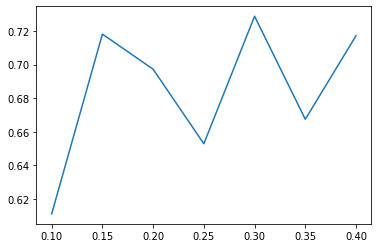

In [30]:
#for the whole dataset
from matplotlib import pyplot as plt
x_p = []
y_p = []
for sp in np.arange(0.1, 0.4, 0.05):
    y_pred, y_test = PerceptronModel(excel, sp, 1)
    p = metrics.accuracy_score(y_test, y_pred)
    y_p.append(p)
    x_p.append(sp)
plt.plot(x_p, y_p)
#when splitting by 7:3, then have the best performance

**Find the best learning rate**

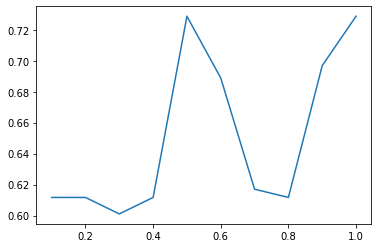

In [29]:
x_p = []
y_p = []

for lr in np.arange(0.1, 1.1, 0.1):
    pred, y_test = PerceptronModel(excel, 0.3, lr)
    p = metrics.accuracy_score(y_test, pred)
    y_p.append(p)
    x_p.append(lr)
plt.plot(x_p, y_p)
#when the learning rate is 0.5/1, the model has the best performance

### ***Accuracy***

In [31]:
y_pred, y_test = PerceptronModel(excel, 0.3, 1)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred, average='micro')
print(confusion_matrix(y_test,y_pred))
print("Precision: ", scores1[0])
print("Recall: " , scores1[1])
print("F1-Score: " ,scores1[2])

Accuracy: 0.7287234042553191
[[151  21  25]
 [ 10  11   8]
 [ 15  23 112]]
Precision:  0.7287234042553191
Recall:  0.7287234042553191
F1-Score:  0.728723404255319


In [32]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
print(confusion_matrix(y_test,y_pred))
print("Precision: ", scores1[0])
print("Recall: " , scores1[1])
print("F1-Score: " ,scores1[2])

Accuracy: 0.7287234042553191
[[151  21  25]
 [ 10  11   8]
 [ 15  23 112]]
Precision:  0.6101227795193312
Recall:  0.6308248244743956
F1-Score:  0.610292756777966
